# MATPLOTLIB

### matplotlib 소개
 - 파이썬 데이터의 시각화 도구
 - 간단한 막대그래프, 선 그래프, 산점도 등을 그릴 때 사용함

In [1]:
import matplotlib.pyplot as plt

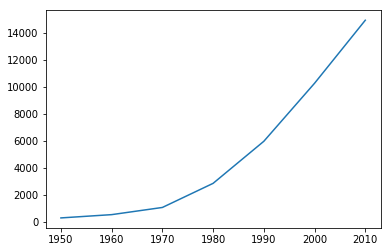

In [19]:
years=[1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp=[300,543,1075,2862,5979,10280,14950]
plt.plot(years, gdp)
plt.show()

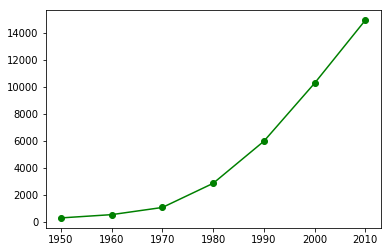

In [20]:
plt.plot(years, gdp, color='green', marker='o')
plt.show()

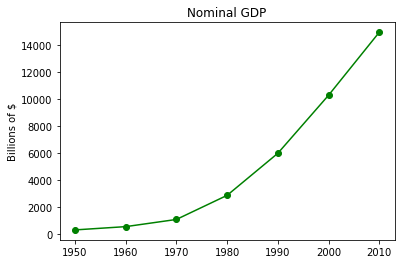

In [23]:
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.show()

### cctv 현황 그래프로 분석하기

In [2]:
import pandas as pd
pop=pd.read_excel('population_in_seoul.xls', header=2, usecols='B,D,G,J,N',
                 encoding='utf-8')
pop.rename(columns={'자치구':'구별', '계':'인구수', '계.1':'한국인',
                   '계.2':'외국인', '65세이상고령자':'고령자'}, inplace=True)
pop.drop([0,26], inplace=True)
pop['외국인비율']=pop['외국인']/pop['인구수']*100
pop['고령자비율']=pop['고령자']/pop['인구수']*100

pop.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [3]:
cctv=pd.read_csv("cctv_in_seoul.csv", encoding='utf-8')
cctv.rename(columns={'기관명':'구별'}, inplace=True)
cctv.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [4]:
data_result=pd.merge(cctv, pop, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


- matplotlib이 가진 기본 폰트는 한글을 지원하지 않으므로 폰트를 변경해야 한다.

In [9]:
from matplotlib import font_manager, rc

In [10]:
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

In [11]:
rc("font", family=font_name)

 - data_result의 소계 결과를 막대그래프로 표현하기
 #### plot() 함수 속성
  - kind='barh' : 수평막대 그래프 그리기
  - grid=True: grid 그리기

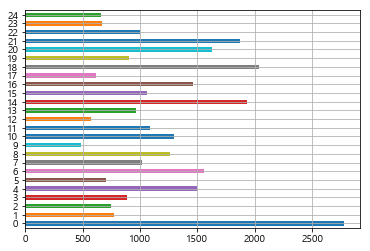

In [12]:
data_result['소계'].plot(kind='barh', grid=True)
plt.show()

 - 인구대비 cctv비율을 계산하고 정렬하여 그래프로 표현하기

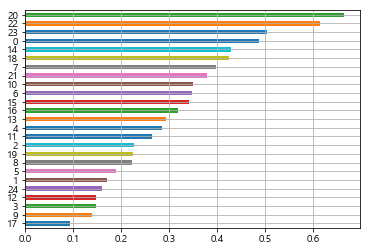

In [14]:
data_result['cctv비율']=data_result['소계']/data_result['인구수']*100
data_result['cctv비율'].sort_values().plot(kind='barh', grid=True)
plt.show()

#### 인구수와 cctv수와의 산점도 그리기 - scatter()함수

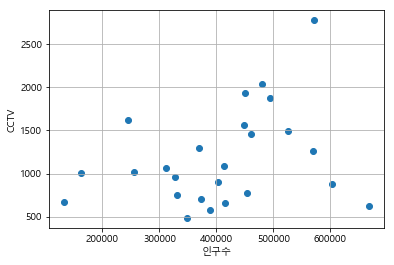

In [16]:
plt.scatter(data_result['인구수'], data_result['소계'])
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

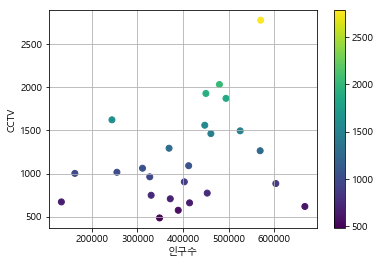

In [17]:
colormap=data_result['소계']
plt.scatter(data_result['인구수'], data_result['소계'], c=colormap)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.colorbar()
plt.show()

# NUMPY

### (1) numpy 소개

 - 과학 연산을 위한 파이썬 핵심 라이브러리. 고성능 다차원 배열을 처리하는 함수와 툴을 제공한다.

In [1]:
import numpy as np

### (2) corrcoef 함수
 - 피어슨 상관계수를 구하는 함수
 
#### np.corrcoef(x,y)
 - 상관계수는 -1부터 1까지의 값을 가짐
 - 명령 결과는 행렬로 나타남.

#### 인구자료와 cctv 개수 필드(소계)와의 상관관계 구하기

In [16]:
np.corrcoef(data_result['고령자비율'], data_result['소계'])
#고령자 비율과 소계와의 상관관계: 큰 의미 없음

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [17]:
np.corrcoef(data_result['외국인비율'], data_result['소계'])
#외국인 비율과 소계와의 상관관계: 큰 의미 없음

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [19]:
np.corrcoef(data_result['인구수'], data_result['소계'])
#약한 양의 상관관계

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

### 인구수와 cctv수 사이의 상관관계를 비교하는 평균선 그리기

#### np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
 - x와 y값으로부터 다항식의 계수를 찾아준다.
 
#### np.poly1d(c_or_r, r=False, variable=None)
 - 폴리노미얼 클래스를 만들어주는 함수.
 - polyfit() 메소드의 결과를 수학적 다항식으로 만듦.

In [5]:
fp1=np.polyfit(data_result['인구수'], data_result['소계'], 1)
f1=np.poly1d(fp1)

#### np.linspace(start, stop, num=50, endpoint=True, restep=False, dtype=None)
 - start부터 stop의 범위에서 균일한 간격으로 num개의 데이터를 생성하여 배열을 만듦.

In [6]:
a=np.linspace(0,1,5)
print(a)

[0.   0.25 0.5  0.75 1.  ]


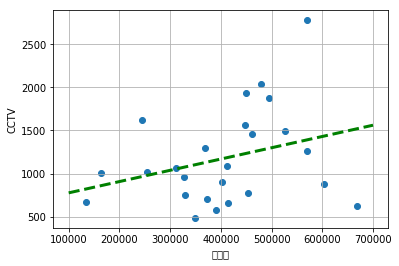

In [10]:
fx=np.linspace(100000, 700000, 100)
import matplotlib.pyplot as plt
plt.scatter(data_result['인구수'], data_result['소계'])
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

### 서울시 구별 범죄/검거 현황 집계

#### np.sum()
 - 배열 원소들을 합치는 변수.
 - 2차원의 경우, axis=0 : 같은 열의 값들을 더함 / axis=1 : 같은 행의 값들을 더함

In [11]:
b=[1,2,3,4]
np.sum(b)

10

In [12]:
c=[[1,2],[3,4]]
np.sum(c, axis=0)

array([4, 6])

In [13]:
np.sum(c, axis=1)

array([3, 7])

# SEABORN

## seaborn 소개
 - matplotlib 기반으로 다양한 색상 테마와 통계용 차트 등의 기능이 추가된 시각화패키지
 - matplotlib도 함께 import하여 사용한다.

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

#### set 명령
 - 전반적인 plot 스타일을 seaborn 기본 스타일로 바꾼다.

#### set_style 명령
 - 틱 스타일을 바꿈

#### set_color_codes 명령
 - 기본 색상을 가리키는 문자열을 바꿈

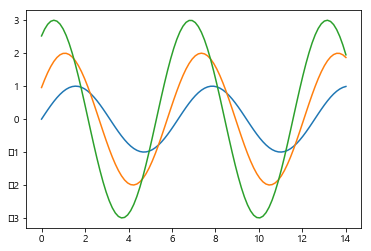

In [21]:
#### sin함수 그리기
import numpy as np
x=np.linspace(0, 14, 100)
y1=np.sin(x)
y2=2*np.sin(x+0.5)
y3=3*np.sin(x+1.0)
plt.plot(x, y1, x, y2, x, y3)
plt.show()

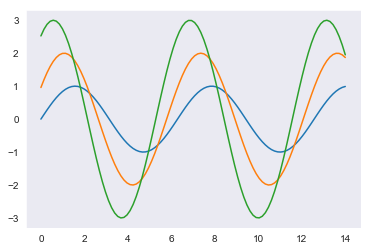

In [22]:
#set_style 변경
sns.set_style("dark")
plt.plot(x, y1, x, y2, x, y3)
plt.show()

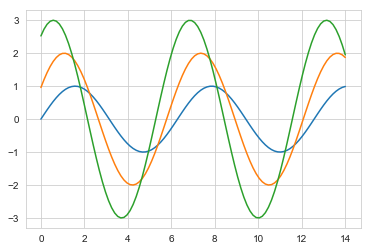

In [23]:
sns.set_style("whitegrid")
plt.plot(x, y1, x, y2, x, y3)
plt.show()

### 1차원 분포 plot

In [24]:
#연습을 위한 샘플 데이터 로드
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### 1) 1차원 실수 분포 plot
 - matplotlib의 단순한 히스토그램과 달리 커널 밀도 및 러그 표시 기능등을 제공함.
 - rugplot, kdeplot, distplot 등

#### rug plot
 - 데이터 위치를 x축 위에 작은 선분으로 나타내어 실제 데이터의 위치를 보여줌.

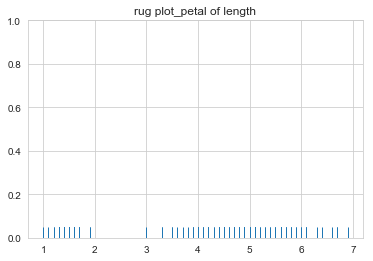

In [26]:
x= iris.petal_length.values
sns.rugplot(x)
plt.title('rug plot_petal of length')
plt.show()

#### kdeplot
 - 커널 밀도. 히스토그램보다 부드러운 형태의 분포 곡선을 보여줌.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


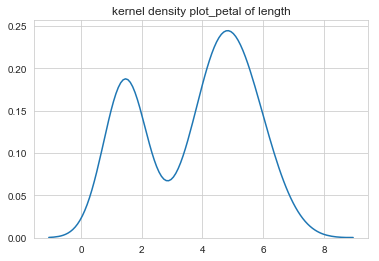

In [28]:
x=iris.petal_length.values
sns.kdeplot(x)
plt.title('kernel density plot_petal of length')
plt.show()

#### distplot
 - 러그와 커널 밀도 표시 가능

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


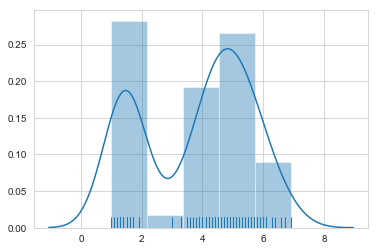

In [30]:
x=iris.petal_length.values
sns.distplot(x, kde=True, rug=True)
plt.show()

### 1차원 카테고리 데이터 분포

In [31]:
#샘플 데이터 로드
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### countplot(x='column_name', data=dataframe)

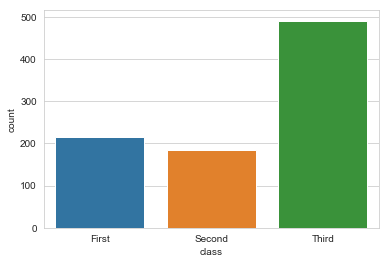

In [32]:
sns.countplot(x='class', data=titanic)
plt.show()

### 다차원데이터

#### jointplot(x='x_name', y='y_name', data=dataframe, kind='scatter')
 - 두 변수 모두 실수 값을 가지고 있을 때.
 - 스캐터plot을 그릴 때 사용
 - 차트의 가장자리에 각 변수의 히스토그램도 그린다
 - kind : 차트의 종류 지정

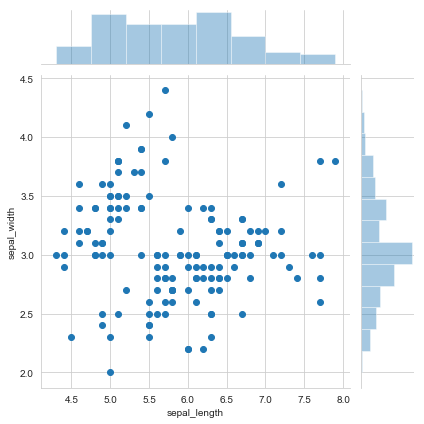

In [33]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris)
plt.show()

- kind='kde' : 커널 밀도 히스토그램을 그린다

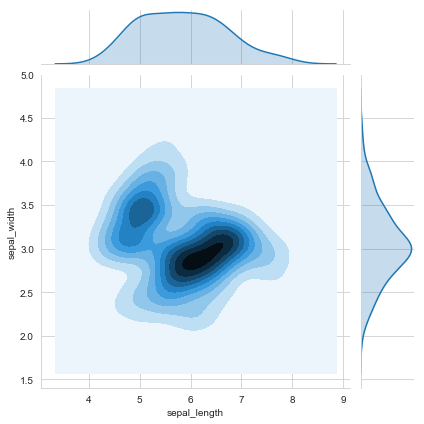

In [35]:
sns.jointplot(x='sepal_length', y='sepal_width', data=iris, kind='kde')
plt.show()

### 2차원 복합 데이터
####  - 2차원 데이터이고 실수 값, 카테고리 값이 섞여 있는 경우

In [37]:
#샘플 데이터 로드
#  어느 호텔의 성별, 요일별 점심, 저녁, 흡연여부, 식사금액, 팁에 대한 데이터
tip=sns.load_dataset('tips')
tip.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


#### barplot(x='열이름', y='열이름', data='데이터이름')
 - 평균: 막대 높이, 편차: 에러바

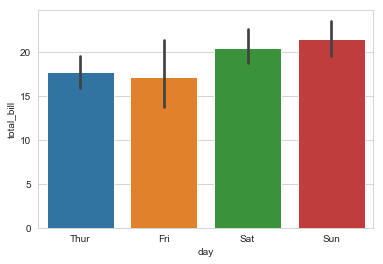

In [40]:
sns.barplot(x='day', y='total_bill', data=tip)
plt.show()

#### boxplot(x=데이터이름['열이름'])

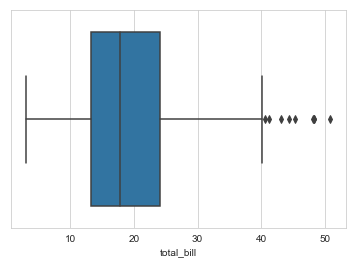

In [42]:
sns.set_style('whitegrid')
sns.boxplot(x=tip['total_bill'])
plt.show()

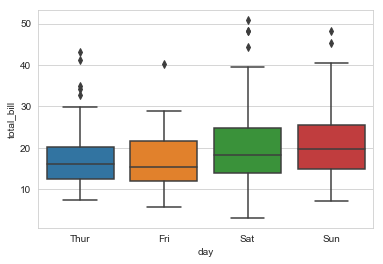

In [43]:
## 범주별로 그룹화되어 세로로 된 boxplot 그리기
sns.boxplot(x='day', y='total_bill', data=tip)
plt.show()

- hue 인수 : hue열의 카테고리 값에 따라 다른 색으로 시각화한다.

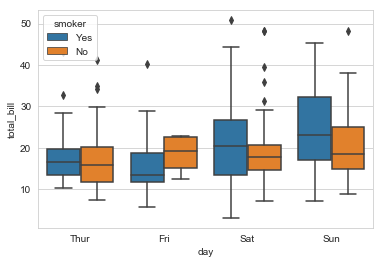

In [44]:
sns.boxplot(x='day', y='total_bill', hue='smoker', data=tip)
plt.show()

#### violinplot(x='열이름', y='열이름', hue='열이름', data='데이터이름')

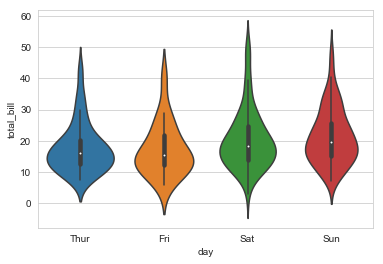

In [46]:
sns.violinplot(x='day', y='total_bill', data=tip)
plt.show()

#### stripplot : 모든 데이터를 점으로
#### swarmplot : 데이터를 나타나는 점이 겹치지 않도록 옆으로 이동

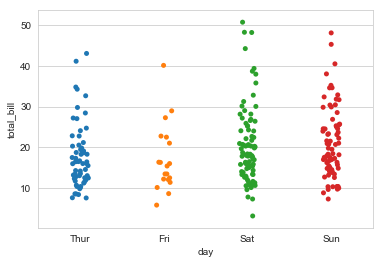

In [47]:
#stripplot
sns.stripplot(x='day', y='total_bill', data=tip)
plt.show()

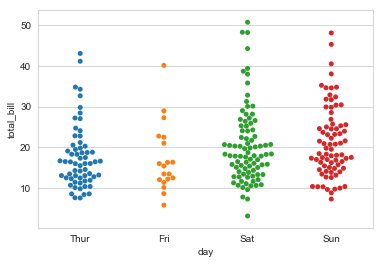

In [48]:
#swarmplot
sns.swarmplot(x='day', y='total_bill', data=tip)
plt.show()

### 다차원 실수형 데이터

#### pairplot

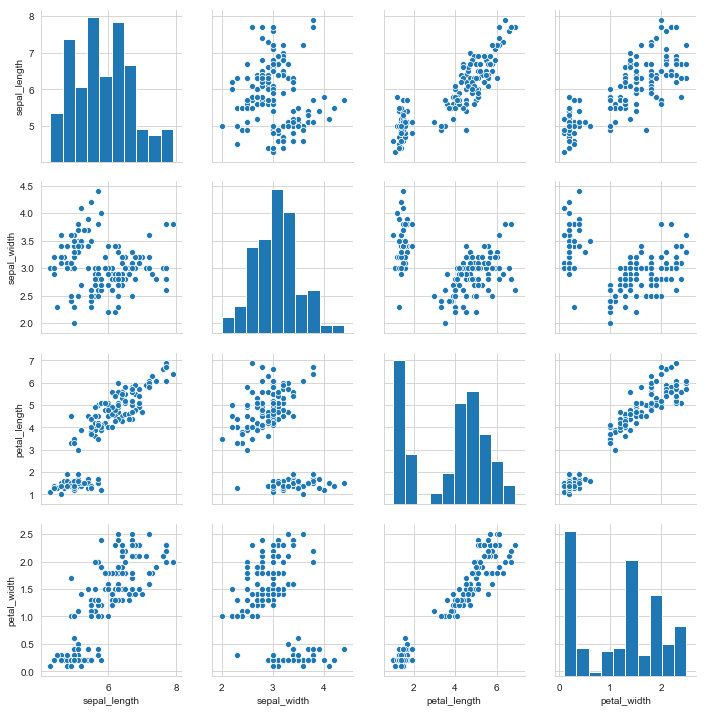

In [49]:
sns.pairplot(iris)
plt.show()

 - hue 옵션에 따라 카테고리 값별로 색상을 다르게 지정

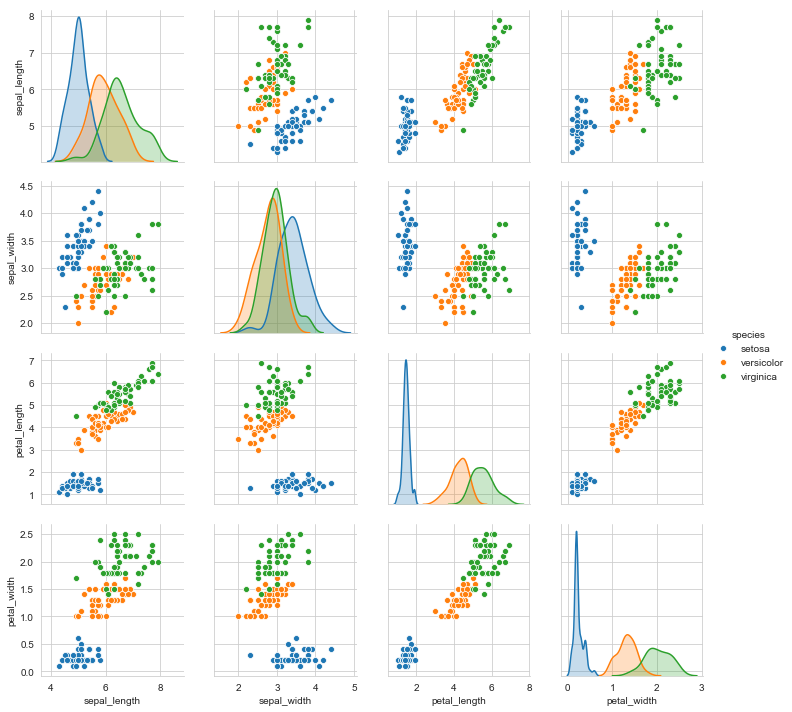

In [50]:
sns.pairplot(iris, hue='species')
plt.show()

### 2차원이고 두 column모두 카테고리 값이 경우

In [51]:
titanic_size=titanic.pivot_table(index='class', columns='sex', aggfunc='size')
titanic_size

sex,female,male
class,,
First,94,122
Second,76,108
Third,144,347


#### heatmap(data, annot=None, fmt='.2g')
 - annot : True 이면 각 셀에 데이터값을 씀
 - fmt : 각 셀에 데이터 값에 사용할 문자열 서식 코드. d: 정수형식

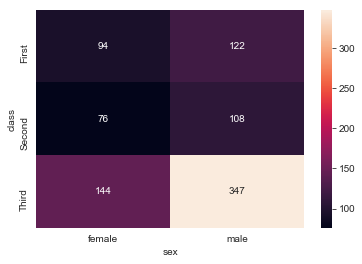

In [52]:
sns.heatmap(titanic_size, annot=True, fmt='d')
plt.show()